In [53]:
cd "/content/drive/My Drive/Colab Notebooks/data_workshop"

/content/drive/My Drive/Colab Notebooks/data_workshop


In [0]:
!git config --global user.name "Krzysztof Wołowiec"
!git config --global user.email "kmwolowiec@gmail.com"

In [0]:
!pip install --upgrade tables

     |████████████████████████████████| 4.3MB 2.8MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_hdf('data/car.h5')
df.sample()

,breadcrumb,created_at,price_currency,price_details,price_value,seller_address,seller_name,seller_type,feature_czujniki-parkowania-przednie,feature_poduszka-powietrzna-chroniąca-kolana,feature_kurtyny-powietrzne,feature_klimatyzacja-dwustrefowa,feature_światła-led,feature_czujnik-zmierzchu,feature_elektrycznie-ustawiane-lusterka,feature_asr-(kontrola-trakcji),feature_poduszka-powietrzna-kierowcy,feature_cd,feature_elektryczne-szyby-przednie,feature_poduszka-powietrzna-pasażera,feature_system-start-stop,feature_światła-do-jazdy-dziennej,feature_komputer-pokładowy,feature_elektryczne-szyby-tylne,feature_klimatyzacja-manualna,feature_tapicerka-welurowa,feature_czujnik-deszczu,feature_światła-przeciwmgielne,feature_ogrzewanie-postojowe,feature_radio-niefabryczne,feature_regulowane-zawieszenie,feature_ogranicznik-prędkości,feature_zmieniarka-cd,feature_szyberdach,feature_isofix,feature_asystent-pasa-ruchu,feature_alufelgi,feature_bluetooth,feature_nawigacja-gps,feature_asystent-parkowania,...,param_particle-filter,param_zarejestrowany-w-polsce,param_oferta-od,param_moc,param_make,param_kraj-pochodzenia,param_engine-power,param_year,param_serwisowany-w-aso,param_rodzaj-paliwa,param_możliwość-finansowania,param_registered-in-poland,param_transmission,param_miesięczna-rata,param_kod-silnika,param_version,param_opłata-początkowa,param_model-pojazdu,param_pojemność-skokowa,param_kierownica-po-prawej-(anglik),param_fuel-type,param_vat-free,param_acrylic,param_damaged,param_door-count,param_tuning,param_filtr-cząstek-stałych,param_nr-of-seats,param_kolor,param_engine-capacity,param_pearl,param_stan,param_wersja,param_emisja-co2,param_body-type,param_matowy,param_bezwypadkowy,param_akryl-(niemetalizowany),param_monthly-payment-value,car_id
73009,"[Osobowe, Renault, Clio, Renault Clio II (1998...","10:32, 1 marca 2018",PLN,"Cena Brutto, Do negocjacji",8700.0,"Krakowska 14 - 32-090 Słomniki, krakowski, Mał...","F.H.U.""OLO""",Dealer,False,False,False,False,False,False,True,False,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,...,None,None,Firmy,98 KM,None,Niemcy,None,None,Tak,Benzyna,Tak,None,None,None,None,None,None,Clio,1 390 cm3,None,None,None,None,None,None,None,None,None,Zielony,None,None,Używane,II (1998-2012),None,None,None,Tak,None,None,73009


In [0]:
df.shape

(106494, 155)

In [0]:
list(df)

['breadcrumb',
 'created_at',
 'price_currency',
 'price_details',
 'price_value',
 'seller_address',
 'seller_name',
 'seller_type',
 'feature_czujniki-parkowania-przednie',
 'feature_poduszka-powietrzna-chroniąca-kolana',
 'feature_kurtyny-powietrzne',
 'feature_klimatyzacja-dwustrefowa',
 'feature_światła-led',
 'feature_czujnik-zmierzchu',
 'feature_elektrycznie-ustawiane-lusterka',
 'feature_asr-(kontrola-trakcji)',
 'feature_poduszka-powietrzna-kierowcy',
 'feature_cd',
 'feature_elektryczne-szyby-przednie',
 'feature_poduszka-powietrzna-pasażera',
 'feature_system-start-stop',
 'feature_światła-do-jazdy-dziennej',
 'feature_komputer-pokładowy',
 'feature_elektryczne-szyby-tylne',
 'feature_klimatyzacja-manualna',
 'feature_tapicerka-welurowa',
 'feature_czujnik-deszczu',
 'feature_światła-przeciwmgielne',
 'feature_ogrzewanie-postojowe',
 'feature_radio-niefabryczne',
 'feature_regulowane-zawieszenie',
 'feature_ogranicznik-prędkości',
 'feature_zmieniarka-cd',
 'feature_szyberd

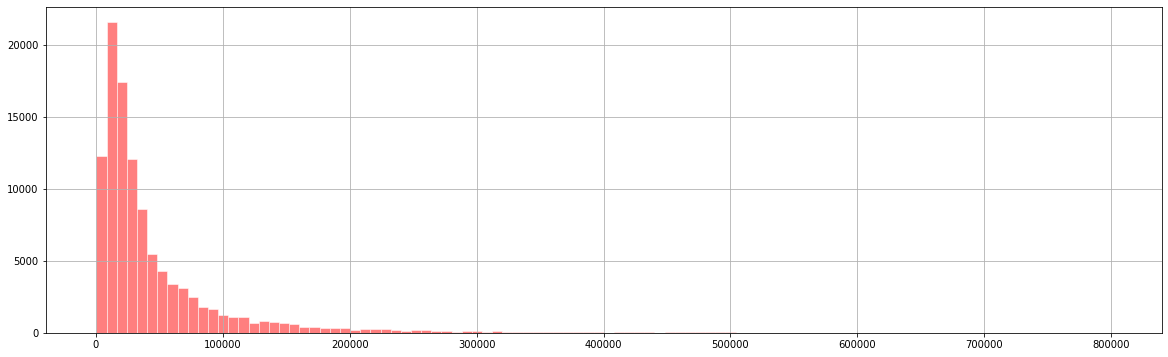

In [0]:
df.price_value.hist(bins=100, alpha=0.5, figsize=(20,6), ec='white', color='r');

In [0]:
df.price_value.describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

In [0]:
df['param_marka-pojazdu'].value_counts()

Volkswagen    11314
Opel           9773
BMW            8327
Audi           7960
Ford           7567
              ...  
Syrena            1
GWM               1
Talbot            1
Plymouth          1
Asia              1
Name: param_marka-pojazdu, Length: 100, dtype: int64

In [0]:
df.groupby('param_marka-pojazdu')['price_value'].mean()

param_marka-pojazdu
Acura         32349.250000
Aixam         26129.208955
Alfa Romeo    52053.311086
Aro           20800.000000
Asia          12500.000000
                  ...     
Yugo          47500.000000
Zaporożec      3900.000000
Zastava        2999.000000
Škoda         40068.437434
Żuk            4722.500000
Name: price_value, Length: 100, dtype: float64

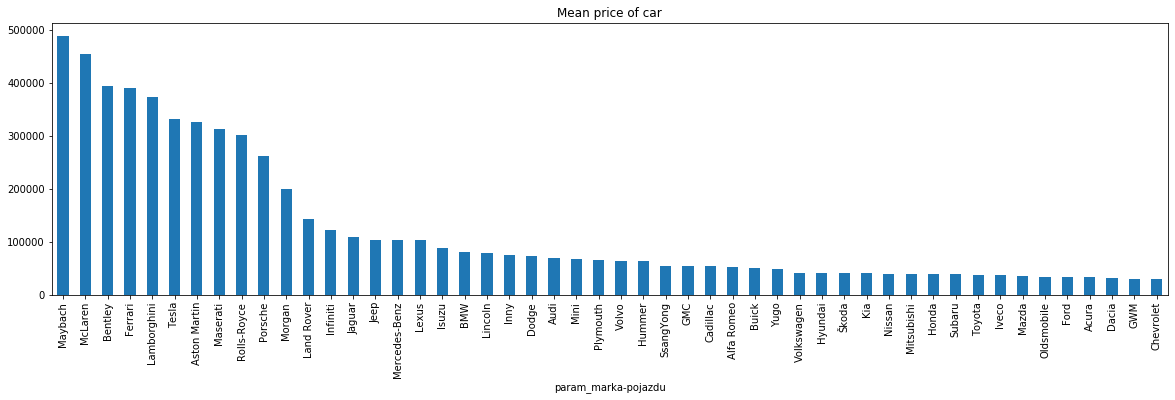

In [0]:
(df.groupby('param_marka-pojazdu')['price_value']
 .agg('mean')
 .sort_values(ascending=False)
  .head(50)
 .plot
 .bar(figsize=(20,5), title='Mean price of car')
 );

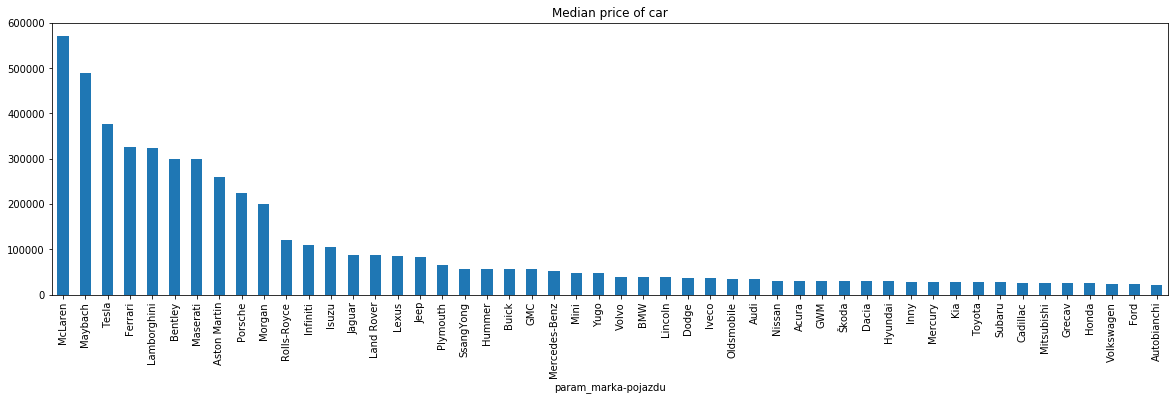

In [0]:
(df.groupby('param_marka-pojazdu')['price_value']
 .agg('median')
 .sort_values(ascending=False)
  .head(50)
 .plot
 .bar(figsize=(20,5), title='Median price of car')
 );

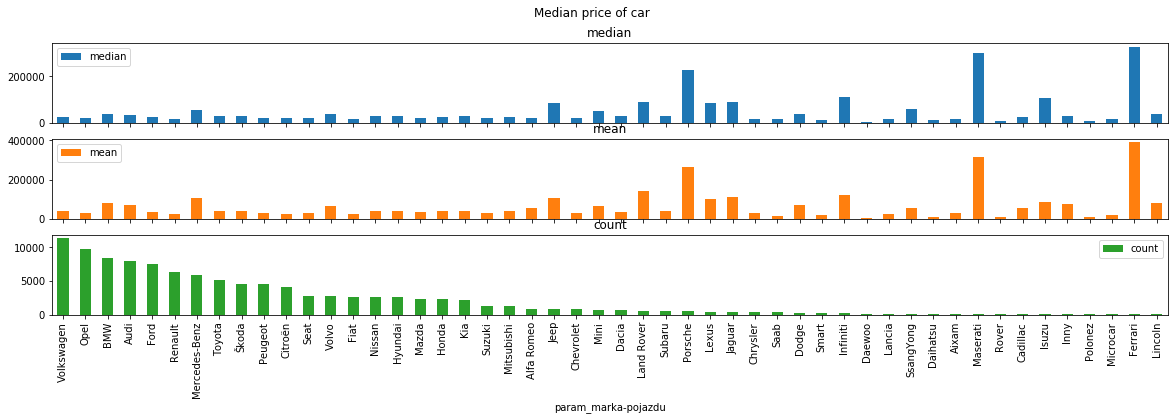

In [0]:
(df.groupby('param_marka-pojazdu')['price_value']
 .agg(['median', 'mean', 'count'])
 .sort_values('count', ascending=False)
  .head(50)
 .plot
 .bar(figsize=(20,5), title='Median price of car', subplots=True)
 );

In [0]:
def group_barplot(feat_groupby, feat_agg='price_values', agg_funcs=['median', 'mean', 'count'], feat_sort='mean', top=50, subplots=True ):
    return (df.groupby(feat_groupby)['price_value']
    .agg(agg_funcs)
    .sort_values('count', ascending=False)
    .head(top)
    .plot
    .bar(figsize=(20,5), title='Median price of car', subplots=subplots)
    )
    

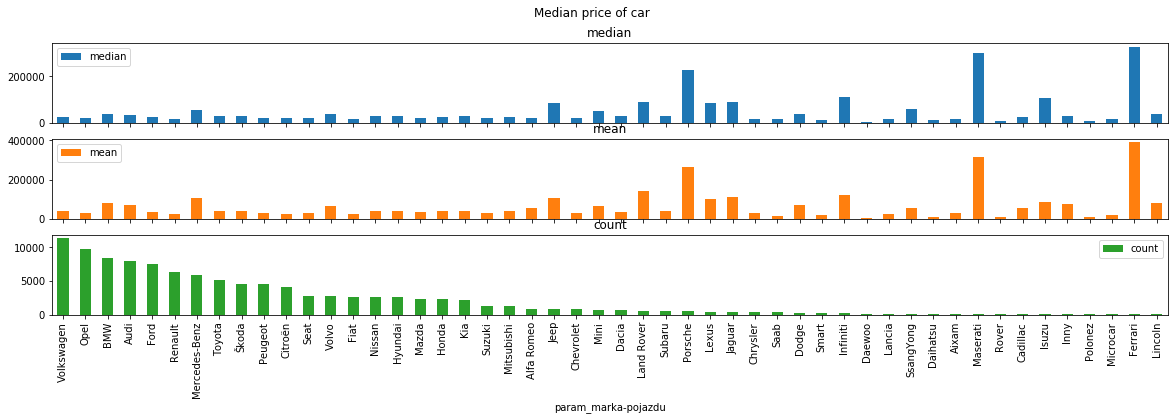

In [0]:
group_barplot('param_marka-pojazdu');

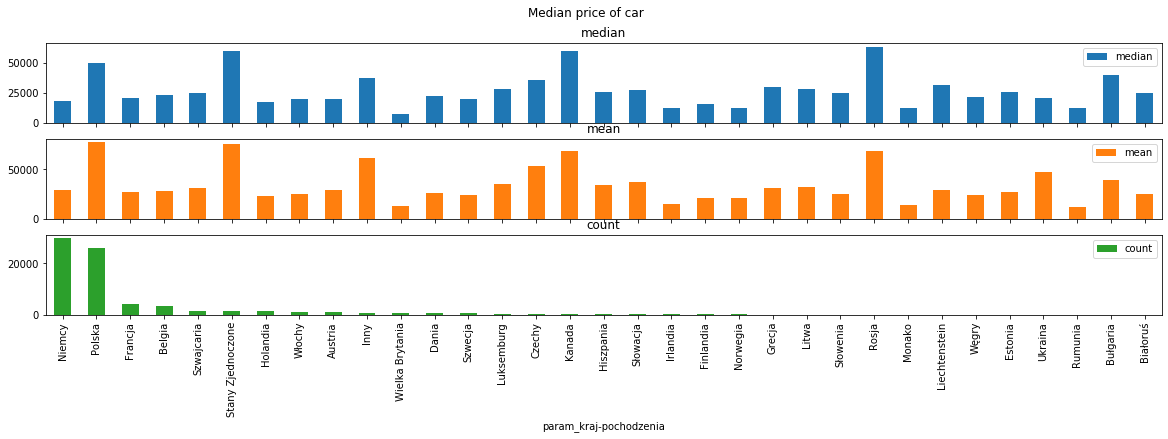

In [0]:
group_barplot('param_kraj-pochodzenia');

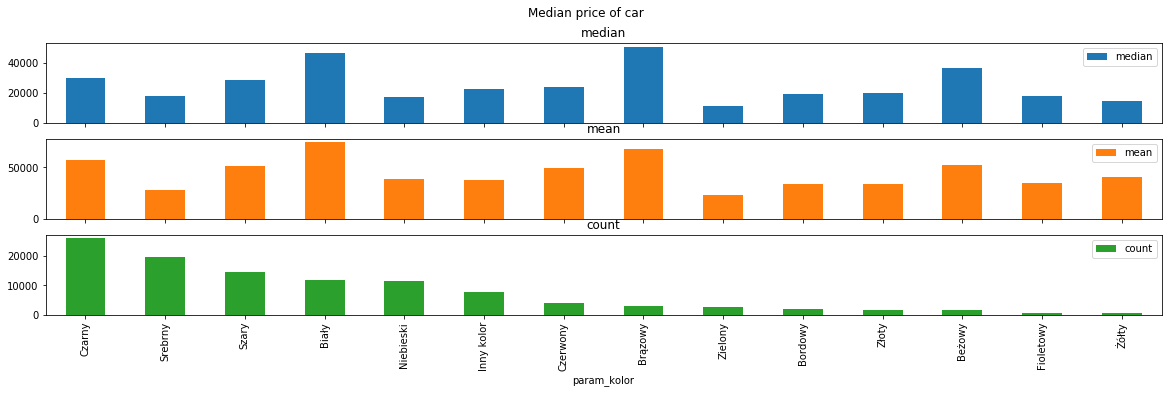

In [0]:
group_barplot('param_kolor');

In [0]:
!mv matrix_two/day2 matrix_two/day2.ipynb